# Project 1: Test A Perceptual Phenomenon 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns 
%matplotlib inline 
sns.set()
stroop = pd.read_csv("stroopdata.csv")

In [4]:
print(stroop.head())
stroop.shape 

   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803


(24, 2)

## Q1: Independent and Dependent Variable 

The **independent variable** is the type of a Stroop task (i.e. a congruent condition and an incongruent condition).  <br />The **dependent variable** is the time it takes for respondents to name ink colors for each condition.    

## Q2: Hypotheses and Statistical Test Setting 

The **null hypothesis** ($H_{o}$) is that the time it takes for people to name ink colors under the congruent and incongruent conditions do not change. $\mu_{C}$ denotes for a congruent population time mean, and $\mu_{I}$ denotes for an incongruent population time mean. <br />The **alternative hypothesis** ($H_{A}$) is that naming ink colors whose texts are different from the corresponding color ($\mu_{I}$) takes more time than naming ink colors whose texts match the color($\mu_{C}$).  

$$H_{o}:\mu_{C} = \mu_{I}$$
$$H_{A}:\mu_{C} < \mu_{I}$$

I would assume that the result of the incongruent condition is statistically significant from the congruent condition. In order to prove this, I will conduct a dependent one-sample t-test (positive direction) with an alpha level of 0.05. Our sample size is 24 and the degree of freedom is 23.   

## Q3: Descriptive Statistics 

In [5]:
stroop.describe() 

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


## Q4: Data Visualizations of the Sample Data 

In [6]:
congruent = stroop["Congruent"]
incongruent = stroop["Incongruent"]

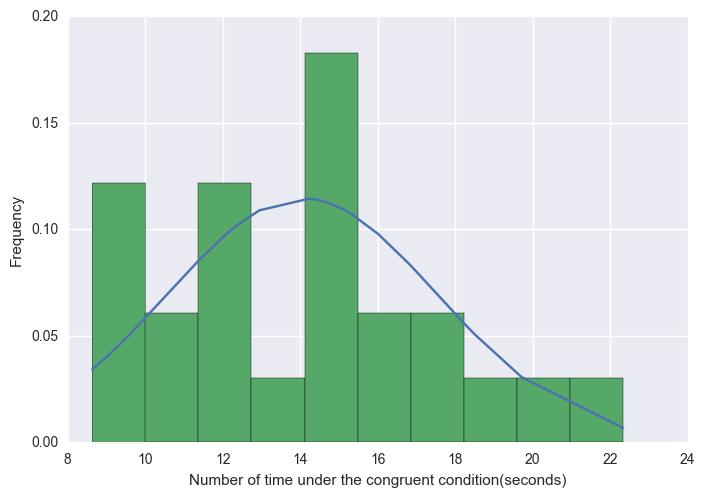

In [7]:
congruent_sorted = sorted(congruent) 
congruent_fit = stats.norm.pdf(congruent_sorted, np.mean(congruent_sorted), np.std(congruent_sorted))
plt.plot(congruent_sorted, congruent_fit)
plt.hist(congruent_sorted, normed=True)
plt.xlabel("Number of time under the congruent condition(seconds)")
plt.ylabel("Frequency")
plt.show()

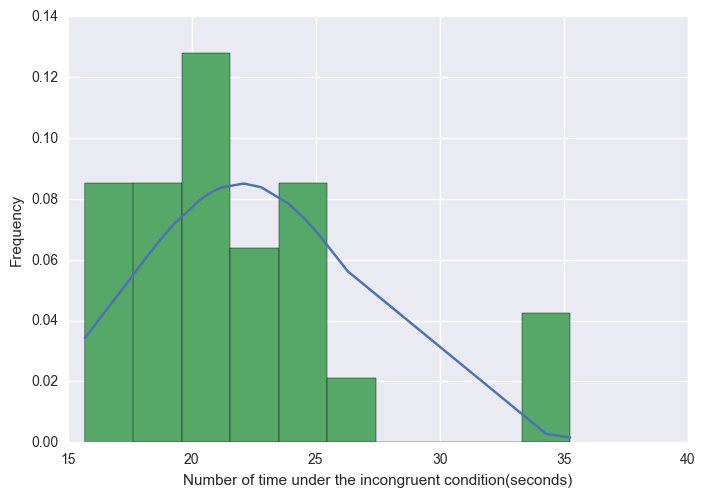

In [8]:
incongruent_sorted = sorted(incongruent)
incongruent_fit = stats.norm.pdf(incongruent_sorted, np.mean(incongruent_sorted), np.std(incongruent_sorted))
plt.plot(incongruent_sorted, incongruent_fit)
plt.hist(incongruent_sorted, normed=True)
plt.xlabel("Number of time under the incongruent condition(seconds)")
plt.ylabel("Frequency")
plt.show()

Among the sample size of 24, under the congruent condition, around 14 to 16 seconds is the highest frequency. On the other hand, under the incongruent condition, around 20 to 22 seconds is the highest frequency, which clearly suggests that the sample participants took more time to name ink colors under the **incongruent condition**.  

/Users/aratatomiyoshi/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


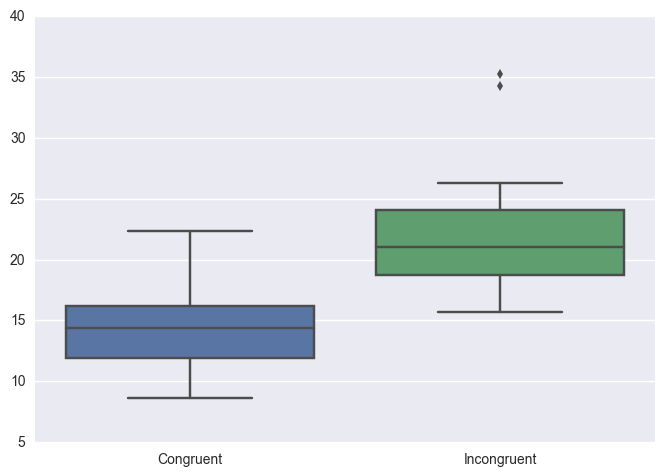

In [3]:
sns.boxplot(stroop)

As you can see the distribution, the incongruent sample boxplot is located more upward compared to the congruent boxplot. The median for the incongruent condition is around 21 to 22 seconds as opposed to 14 seconds for the congruent condition. There are a few outliers mixed in the incongruent condition sample.  

## Q5: Statistical Test and the Test Results 

In [10]:
stroop["Difference"] = stroop["Incongruent"] - stroop["Congruent"]

In [11]:
difference_mean = np.mean(stroop["Difference"])
difference_std = np.std(stroop["Difference"], ddof=1)
print "Difference mean: ", difference_mean
print "Difference sd: ", difference_std
SEM = difference_std/np.sqrt(24) 
t_statistic = difference_mean / (SEM)
print "t_statistic: ", t_statistic

Difference mean:  7.96479166667
Difference sd:  4.86482691036
t_statistic:  8.02070694411


The t-critical value at an alpha-level of 0.05 = 1.714, t(23) = 8.02, p < 0.05, one-tailed.  <br />
**Reject the null** : the probability of the t-statistic is extremely small, in order words, a population would take significantly more time to name the ink colors under the incongruent condition compared to the congruent condition.  


## Optional: Effect Size and the Confidence Interval 

In order to figure out the effect size of the incongruent condition, I will compute the $r^2$ test.  
$$r^2=\frac{t^2}{t^2+df}$$

In [12]:
r_squared = t_statistic/(t_statistic + 23) 
print(r_squared)

0.258559772947


For the time difference between the congruent and incongruent conditions, 26% of the difference is attributed to the incongruent condition. In other words, the other 74% can be explained by some other factors.   <br /> 
I will conpute the 95% confidence interval of the true mean of the population for this test.     

In [13]:
lower = difference_mean - (1.714 * SEM)
upper = difference_mean + (1.714 * SEM) 
print(lower, upper)

(6.2627405866565908, 9.6668427466767426)


95% C.I. = (6.26, 9.67)  <br />
This 95% confidence interval tells us that if a stroop task is conducted on a whole population, on average, people would take 6.26 seconds to 9.67 seconds more on naming the ink color of the text under the incongruent condition compared to the congruent condition.   

### Reference sites  

http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html  <br />
http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html  <br />
http://stackoverflow.com/questions/26188124/carriage-returns-in-markdown-section-of-ipython-notebook  <br />
http://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib  <br />
http://stackoverflow.com/questions/34050491/standard-deviation-in-numpy  <br />
https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html  <br />
http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/ <br />
http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/